In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Tatacoffee13_21.csv',parse_dates=['Date'],index_col='Date')

In [3]:
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [4]:
#Start date and end_date
from datetime import datetime,timedelta
start_date=pd.to_datetime("2013-01-01")
end_date=pd.to_datetime("2019-02-04")-timedelta(days=1) # exclude last date

#List of all dates
all_date=pd.date_range(start_date,end_date,freq='d') # series of all date including holidays

In [5]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [6]:
dummyDate=dataset

In [7]:
dummyDate.index=all_date

In [8]:
dummyDate

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


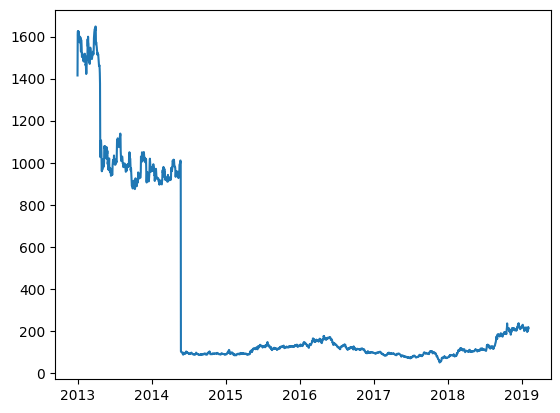

In [9]:
import matplotlib.pyplot as plt
plt.plot(dataset['Close'])

<Figure size 1600x500 with 0 Axes>

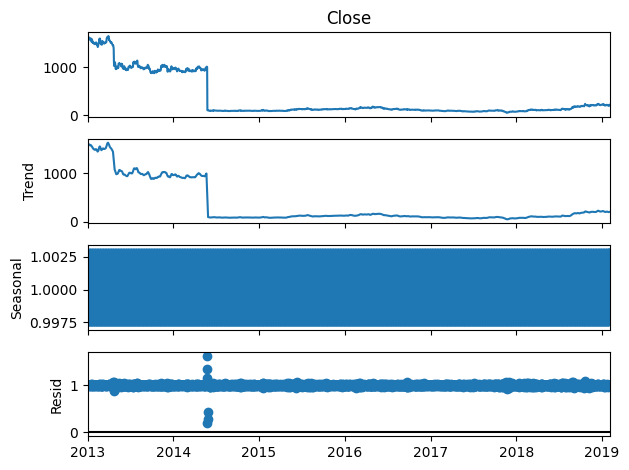

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(dummyDate['Close'],model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

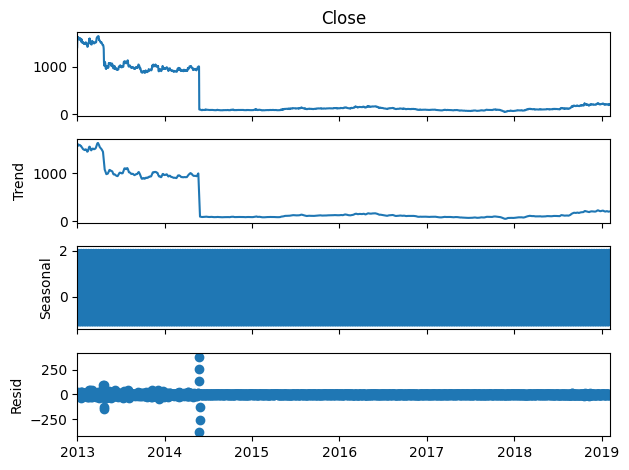

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(dummyDate['Close'],model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [22]:
# performing Augmented dickey fuller test to check hypothesis
from statsmodels.tsa.stattools import adfuller
#plt.plot(figsize=(16,5))
print ('Results of Dickey-Fuller Test:')
dftest=adfuller(dataset['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key ] = value
    #dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)    
ans=dfoutput
print("Condition:")
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")
if(ans['Test Statistic']<ans['Critical value (1%)'] or ans['Test Statistic']<ans['Critical value (5%)'] or
   ans['Test Statistic']<ans['Critical value (10%)'] and ans['p-value'] < 0.05):
    #Test statistic < 1%,5%,10% and p_value<=0.05 
  print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis")
  print("Reject null hypothesis:Non Stationarity")
  print("Accept Alternate hypothesis:Stationarity")
  message="Stationarity based on ADH"  

else:
    print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis")
    print("Accept null hypothesis:Non Stationarity" )
    print("Reject Alternate hypothesis:Staionarity ")
    message="Non-stationarity based on ADH"


Results of Dickey-Fuller Test:
Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical value (1%)              -3.433295
Critical value (5%)              -2.862841
Critical value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Stationarity


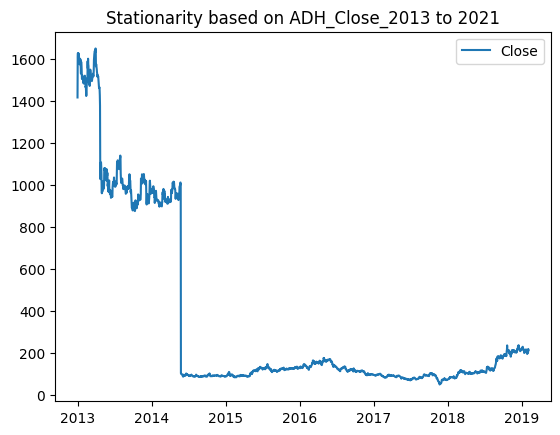

In [23]:
plt.plot(dataset.index, dataset['Close'],label="Close")
plt.legend(loc='best')
plt.title("{}_Close_2013 to 2021".format(message))
#plt.savefig("{}_ADH.png".format(pollutant))
plt.show()

In [27]:
# decoding the same in function

In [25]:
def adf_test(timeseries,df,dfClose):
    # performing Augmented dickey fuller test to check hypothesis
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key ] = value
    print(dfoutput)    
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans['Critical value (1%)'] or ans['Test Statistic']<ans['Critical value (5%)'] or
       ans['Test Statistic']<ans['Critical value (10%)'] and ans['p-value'] < 0.05):
        #Test statistic < 1%,5%,10% and p_value<=0.05 
      print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis")
      print("Reject null hypothesis:Non Stationarity")
      print("Accept Alternate hypothesis:Stationarity")
      message="Stationarity based on ADH"  
    
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"

    plt.plot(df.index, df['Close'],label=dfClose)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,dfClose))
    #plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()

    return message
    

Results of Dickey-Fuller Test:
Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical value (1%)              -3.433295
Critical value (5%)              -2.862841
Critical value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothesis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Stationarity


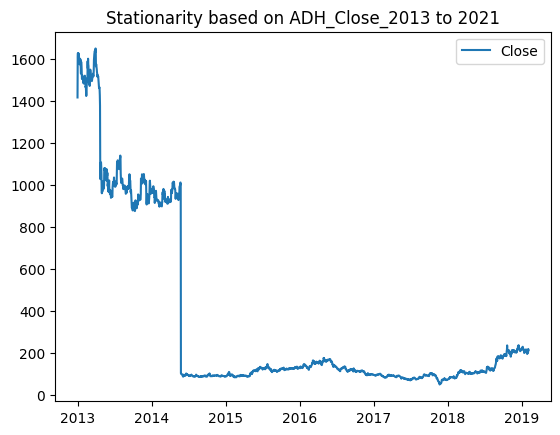

'Stationarity based on ADH'

In [26]:
adf_test(dataset['Close'],dataset,'Close')